# Tabular Kaggle Project

Guideline for steps for the Kaggle Tabular Project. You will "turn in" a GitHub repository, modeled after [Project Template](https://github.com/UTA-DataScience/ProjectTempate) on the day of the final, Friday, May 2 at 11 – 1:30 pm. During the final period we will have about 5 minutes to go over your project and your results.

You can find a list of possible Tabular datasets here on [Excel File in Teams](https://mavsuta.sharepoint.com/:x:/r/teams/Course_2252_data_3402_001-NLyiqHJ5btv8Y/Shared%20Documents/General/Kaggle%20Tabular%20Datasets.xlsx?d=w34cdd3378d1146a2ab63700189a8c5b5&csf=1&web=1&e=6ASD5s). You are not limited to these datasets. If you find a Kaggle challenge not listed that you would like to attempt, please go check with Dr. Farbin to make sure it is viable.

This notebook outlines the steps you should follow. The file(s) in the GitHub repository should contain these steps. Note that you will be only considering classification projects.

## Define Project

* Project link: https://www.kaggle.com/datasets/gallo33henrique/bioinformatics-protein-dataset-simulated?select=proteinas_test.csv
* Challenge description: The Kaggle project involves a binary classification task using a simulated bioinformatics protein dataset. The main challenge is to develop a machine learning model that is able to accurately predict, based on its various simulation features, whether a given protein belongs to a specific class (possibly a disease-related or functional category). This classification is a common problem in bioinformatics, where identifying proteins with specific properties is critical to research and drug discovery.
 
* Data description:The dataset contains simulated protein data intended for a multi-class classification task. It includes 20,000 synthetic proteins split into a training set of 16,000 samples (proteinas_train.csv) and a test set of 4,000 samples (proteinas_test.csv). Each protein is characterized by an ID_Protein, its amino acid Sequence, and several calculated physicochemical properties: Molecular_Weight, Isoelectric_Point, Hydrophobicity, Total_Charge, Polar_Proportion, Nonpolar_Proportion, and Sequence_Length. The target variable is Class, which categorizes each protein into one of five functional classes: Enzyme, Transport, Structural, Receptor, or Other. Although the data is synthetic, it is based on real protein data sets and aims to mimic the patterns observed in them, making it suitable for exploring machine learning methods in bioinformatics. The features provide quantitative descriptions of the protein's composition and characteristics that can be used to predict its functional class.


## Data Loading and Initial Look

* Load the data. 
* Count the number of rows (data points) and features.
* Any missing values? 
* Make a table, where each row is a feature or collection of features:
    * Is the feature categorical or numerical
    * What values? 
        * e.g. for categorical: "0,1,2"
        * e.g. for numerical specify the range
    * How many missing values
    * Do you see any outliers?
        * Define outlier.
* For classification is there class imbalance?
* What is the target:
    * Classification: how is the target encoded (e.g. 0 and 1)?
    * Regression: what is the range?

In [26]:
ls -h

'Data Cleaning Machine Learning.ipynb'   proteinas_test.csv
'Kaggle Tabular Data.ipynb'              proteinas_train.csv
'Machine Learning.ipynb'


In [28]:
ls -a

 ./                                     'Kaggle Tabular Data.ipynb'
 ../                                    'Machine Learning.ipynb'
 .ipynb_checkpoints/                     proteinas_test.csv
'Data Cleaning Machine Learning.ipynb'   proteinas_train.csv


In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [2]:
df = pd.read_csv("proteinas_train.csv")
print("***** Train/proteinas_train.csv loaded successfully *****")
df.head() # Display first few rows. 

***** Train/proteinas_train.csv loaded successfully *****


,ID_Proteína,Sequência,Massa_Molecular,Ponto_Isoelétrico,Hidrofobicidade,Carga_Total,Proporção_Polar,Proporção_Apolar,Comprimento_Sequência,Classe
0,TRAIN_P00001,GNMRFVLHDEETHWGTLRTTLNCVPSDIYTISGEDSLFWGMAHPFC...,20362.9468,4.866123,0.149425,-3,0.241379,0.408046,174,Estrutural
1,TRAIN_P00002,LFKMQCSFYLLYLAKEAASYQVSMNMLCYEWYNYVYQVTVILRLSR...,9328.7909,6.298636,0.217105,0,0.210526,0.513158,76,Estrutural
2,TRAIN_P00003,PAHLWPYWRFYVWIVFYGYHNPNYHFGMKEVKERPDCKNCTVAVLF...,17616.3852,8.458977,0.192568,8,0.141892,0.466216,148,Estrutural
3,TRAIN_P00004,GEAFSRPHCFACAATKKGFPWARMCCTTSMAMDGVQSKMHKSKHRF...,35244.2968,8.448340,0.160473,21,0.189189,0.408784,296,Estrutural
4,TRAIN_P00005,HYVFQGLMLHCGGYMITACGFGVIFPEQMTREGLIMHTARAHHFLI...,34557.9931,7.696306,0.140411,18,0.202055,0.380137,292,Receptora


- Loaded the training dataset from the provided CSV file.

In [3]:
num_rows = df.shape[0]
num_features = df.shape[1]

# Count the number of rows (data points) and features
print(f"Number of rows (data points): {num_rows}")
print(f"Number of features (columns):{num_features}")

Number of rows (data points): 16000
Number of features (columns):10


- Checked for successful data loading and verified the shape of the dataset (number of rows and columns).

In [4]:
np.any(df.isnull()) # test for null values

np.False_

In [5]:
print("--- Missing Values ---")
df.isnull() .sum()

--- Missing Values ---


ID_Proteína              0
Sequência                0
Massa_Molecular          0
Ponto_Isoelétrico        0
Hidrofobicidade          0
Carga_Total              0
Proporção_Polar          0
Proporção_Apolar         0
Comprimento_Sequência    0
Classe                   0
dtype: int64

In [6]:
unique_classes= df['Classe'].unique()
print("Unique classes in the 'Classe'column:")
print(unique_classes)

Unique classes in the 'Classe'column:
['Estrutural' 'Receptora' 'Enzima' 'Transporte' 'Outras']


* Not a binary classification. There are 5 classes: Estrutural, Receptora, Enzima, Tranporte, and Outras.

In [7]:
# Feature Analysis Table
feature_analysis = []
for col in df.columns:
    feature_info = {'Feature Name': col}
    feature_info['Data Type'] = df[col].dtype # Determine feature types
    
    if df[col].dtype == 'object':
        feature_info['Unique Values'] = df[col].nunique()
        feature_info['Example Values'] = ', '.join(df[col].unique()[:5].astype(str)) + ('...' if df[col].nunique() > 5 else '')
        feature_info['Is Categorical'] = True
        feature_info['Is Numerical'] = False
    else: # Numerical
        feature_info['Min Value'] = df[col].min()
        feature_info['Max Value'] = df[col].max()
        feature_info['Unique Values'] = df[col].nunique()
        feature_info['Is Categorical'] = False
        feature_info['Is Numerical'] = True
        

    feature_info['Missing Values'] = df[col].isnull().sum()
    feature_analysis.append(feature_info)

analysis_df = pd.DataFrame(feature_analysis)

In [8]:
analysis_df

,Feature Name,Data Type,Unique Values,Example Values,Is Categorical,Is Numerical,Missing Values,Min Value,Max Value
0,ID_Proteína,object,16000,"TRAIN_P00001, TRAIN_P00002, TRAIN_P00003, TRAI...",True,False,0,NaN,NaN
1,Sequência,object,16000,GNMRFVLHDEETHWGTLRTTLNCVPSDIYTISGEDSLFWGMAHPFC...,True,False,0,NaN,NaN
2,Massa_Molecular,float64,16000,NaN,False,True,0,5463.212900,37588.751700
3,Ponto_Isoelétrico,float64,14306,NaN,False,True,0,4.050028,11.711987
4,Hidrofobicidade,float64,4604,NaN,False,True,0,0.014563,0.284314
5,Carga_Total,int64,61,NaN,False,True,0,-20.000000,47.000000
6,Proporção_Polar,float64,3277,NaN,False,True,0,0.049180,0.380282
7,Proporção_Apolar,float64,3833,NaN,False,True,0,0.200000,0.607843
8,Comprimento_Sequência,int64,251,NaN,False,True,0,50.000000,300.000000
9,Classe,object,5,"Estrutural, Receptora, Enzima, Transporte, Outras",True,False,0,NaN,NaN



* The dataset has 16000 protein samples and 10 features (including the target variable Classe).
There are no missing values in any of the columns.

* NaN means not applicable to categorical data.

* ID_Proteína and Sequência are unique identifiers and the protein sequence itself (categorical).

* Massa_Molecular, Ponto_Isoelétrico, Hidrofobicidade, Carga_Total, Proporção_Polar, Proporção_Apolar, and Comprimento_Sequência are numerical features with varying ranges and numbers of unique values.

 * Classe is the categorical target variable with five distinct categories.

In [9]:
!pip install tabulate

Defaulting to user installation because normal site-packages is not writeable


In [10]:
from IPython.display import HTML, display
from tabulate import tabulate

html_table = tabulate(analysis_df, headers='keys', tablefmt='html',showindex=False)
display(HTML(html_table))

Feature Name,Data Type,Unique Values,Example Values,Is Categorical,Is Numerical,Missing Values,Min Value,Max Value
ID_Proteína,object,16000,"TRAIN_P00001, TRAIN_P00002, TRAIN_P00003, TRAIN_P00004, TRAIN_P00005...",True,False,0,nan,nan
Sequência,object,16000,"GNMRFVLHDEETHWGTLRTTLNCVPSDIYTISGEDSLFWGMAHPFCYPGSKRTMHPMWQSSDDCANCGTYWMGWDSPIQETEYRWMMDWITMESDALAGRNCCVMNMDWVRSCSSWTHIKSYLTGMNYMAMTFQFVDGDFNDQSLVCMDIWNFPSIATATKPYQFFTLPHVVWK, LFKMQCSFYLLYLAKEAASYQVSMNMLCYEWYNYVYQVTVILRLSREWCPVCTYCYWFVERRVWTTDSTEACCFNC, PAHLWPYWRFYVWIVFYGYHNPNYHFGMKEVKERPDCKNCTVAVLFIAIDWISTYIPLKPVAWCLYSIRYCVGQPAFEWESGNCKDRVLFMIWFDDSKNVTFKQPAQDMHCRAVQVMPAGLSCHRATFMCPVPPRKCWMEWNSTDVVF, GEAFSRPHCFACAATKKGFPWARMCCTTSMAMDGVQSKMHKSKHRFVKWFDCYGSDCTYKWHSDIHGSWSRCCQEAWTMFKHKVTRMLLSWVMCNICFNWCSKEDHLIMFAYFLDMTRPEQDHTTKFCHLAYRCENKAYFTGCFDRCLAMDTIVFDQQQIKTDSQMRMPMAAFYGRHPNSSACFKMNGAHMWASFYTPCHGKFNPMHHCFLAPSAYMWILAQGDFFDMEVEIWDQSWWSGFNRFWYSLETMGDPIVNNCMWPQSRRACLYDPGPPFYYSQNFDVHMRRARSEWMFK, HYVFQGLMLHCGGYMITACGFGVIFPEQMTREGLIMHTARAHHFLIHHFPMTVKAKAFGRFTCQRTVVVGEKGYVILKNSRQHTVNDCDDQIQERKLRNFGIYLPYYSIQNQQNETMGHWKQPETVSTYPQATSFSLWTVEPANWFMQGYVCKRDILGEPSLGFFGNLRKLCAKGLEPFQDRWGQECQRCSYTWSNEDEHLHASKWRQDGYEERDQKGHPASFEAYQKFTHTWDFCWDYSLYTWWPYMERDYHKQGQMKMHEALVHCSPHFLFTGIGKTYEGQCVMCIIMRF...",True,False,0,nan,nan
Massa_Molecular,float64,16000,nan,False,True,0,5463.21,37588.8
Ponto_Isoelétrico,float64,14306,nan,False,True,0,4.05003,11.712
Hidrofobicidade,float64,4604,nan,False,True,0,0.0145631,0.284314
Carga_Total,int64,61,nan,False,True,0,-20,47
Proporção_Polar,float64,3277,nan,False,True,0,0.0491803,0.380282
Proporção_Apolar,float64,3833,nan,False,True,0,0.2,0.607843
Comprimento_Sequência,int64,251,nan,False,True,0,50,300
Classe,object,5,"Estrutural, Receptora, Enzima, Transporte, Outras",True,False,0,nan,nan


* The table summarizes the characteristics of each column in proteinas_train.csv

In [11]:
# Load dataset
def load_protein_dataset(file_path="proteinas_train.csv"):
    """Loads the protein training dataset. """

    df_train = pd.read_csv(file_path)
    return {"Training": df_train} # returns DF in a dictionary 

#Loads protein training data
protein_data = load_protein_dataset()

if protein_data:
    df_protein = protein_data["Training"]
    print("proteinas_train.csv loaded successfully.")
    df_protein.head()

proteinas_train.csv loaded successfully.


In [12]:
# features based on properties 
numerical_features_list = list(analysis_df[analysis_df['Is Numerical'] == True]['Feature Name'])
numerical_features_list

['Massa_Molecular',
 'Ponto_Isoelétrico',
 'Hidrofobicidade',
 'Carga_Total',
 'Proporção_Polar',
 'Proporção_Apolar',
 'Comprimento_Sequência']

In [13]:
# categorical names
categorical_features_list = list(analysis_df[analysis_df['Is Categorical'] == True]['Feature Name'])
categorical_features_list

['ID_Proteína', 'Sequência', 'Classe']

In [14]:
df_protein.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16000 entries, 0 to 15999
Data columns (total 10 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   ID_Proteína            16000 non-null  object 
 1   Sequência              16000 non-null  object 
 2   Massa_Molecular        16000 non-null  float64
 3   Ponto_Isoelétrico      16000 non-null  float64
 4   Hidrofobicidade        16000 non-null  float64
 5   Carga_Total            16000 non-null  int64  
 6   Proporção_Polar        16000 non-null  float64
 7   Proporção_Apolar       16000 non-null  float64
 8   Comprimento_Sequência  16000 non-null  int64  
 9   Classe                 16000 non-null  object 
dtypes: float64(5), int64(2), object(3)
memory usage: 1.2+ MB


- ID_Proteína (Protein ID)
- Sequência (Amino acid sequence)
- Massa_Molecular (Molecular Mass)
- Ponto_Isoelétrico (Isoelectric point)
- Hidrofobicidade (Hydrophobicity)
- Carga_Total (Total charge)
- Proporção_Polar (Proportion of polar amino acids)
- Proporção_Apolar (Proportion of nonpolar amino acids)
- Comprimento_Sequência (Sequence length)
- Classe (Functional class of the protein)

In [15]:
feature_types = []
for col in df_protein.columns:
    if df_protein[col].dtype == 'object':
        feature_types.append((col, True))  # Categorical
    else:
        feature_types.append((col, False)) # Numerical

print(feature_types)

[('ID_Proteína', True), ('Sequência', True), ('Massa_Molecular', False), ('Ponto_Isoelétrico', False), ('Hidrofobicidade', False), ('Carga_Total', False), ('Proporção_Polar', False), ('Proporção_Apolar', False), ('Comprimento_Sequência', False), ('Classe', True)]


In [16]:
print(df_protein.columns)

Index(['ID_Proteína', 'Sequência', 'Massa_Molecular', 'Ponto_Isoelétrico',
       'Hidrofobicidade', 'Carga_Total', 'Proporção_Polar', 'Proporção_Apolar',
       'Comprimento_Sequência', 'Classe'],
      dtype='object')


In [17]:
print("--------------------- Outlier Analysis ---------------------")

# Initial assessment of potential outliers based on the ranges from the analysis_df
print("\nInitial Assessment of Potential Outliers:")
numerical_df = analysis_df[analysis_df['Is Numerical'] == True] # Filter only numerical

for index, row in numerical_df.iterrows():
    print(f"{row['Feature Name']}: Range [{row['Min Value']:.2f}, {row['Max Value']:.2f}]")

print("Based on the ranges of the numerical features,using visualization diagrams (histogram, box plots) and statistical methods is needed to identifythe potential outliers. ")

--------------------- Outlier Analysis ---------------------

Initial Assessment of Potential Outliers:
Massa_Molecular: Range [5463.21, 37588.75]
Ponto_Isoelétrico: Range [4.05, 11.71]
Hidrofobicidade: Range [0.01, 0.28]
Carga_Total: Range [-20.00, 47.00]
Proporção_Polar: Range [0.05, 0.38]
Proporção_Apolar: Range [0.20, 0.61]
Comprimento_Sequência: Range [50.00, 300.00]
Based on the ranges of the numerical features,using visualization diagrams (histogram, box plots) and statistical methods is needed to identifythe potential outliers. 


In [18]:
print("\n---------------- Class Imbalance Analysis ----------------")
print(df['Classe'].value_counts()) # distribution of classes


---------------- Class Imbalance Analysis ----------------
Classe
Enzima        3235
Estrutural    3232
Transporte    3225
Outras        3183
Receptora     3125
Name: count, dtype: int64


In [19]:
# TARGET VALUE
print("---- Target Value ---")
print(f"Target Variable: Classe")
print(f"Encoding: String labels (e.g., '{', '.join(df['Classe'].unique())}')")

---- Target Value ---
Target Variable: Classe
Encoding: String labels (e.g., 'Estrutural, Receptora, Enzima, Transporte, Outras')


## Data Visualization

* For classification: compare histogram every feature between the classes. Lots of examples of this in class.
* For regression: 
    * Define 2 or more class based on value of the regression target.
        * For example: if regression target is between 0 and 1:
            * 0.0-0.25: Class 1
            * 0.25-0.5: Class 2
            * 0.5-0.75: Class 3
            * 0.75-1.0: Class 4
    * Compare histograms of the features between the classes.
        
* Note that for categorical features, often times the information in the histogram could be better presented in a table.    
* Make comments on what features look most promising for ML task.

In [20]:
%matplotlib inline
import matplotlib.pyplot as plt
import math
import scipy.stats
import pandas as pd
import numpy as np
from scipy import stats

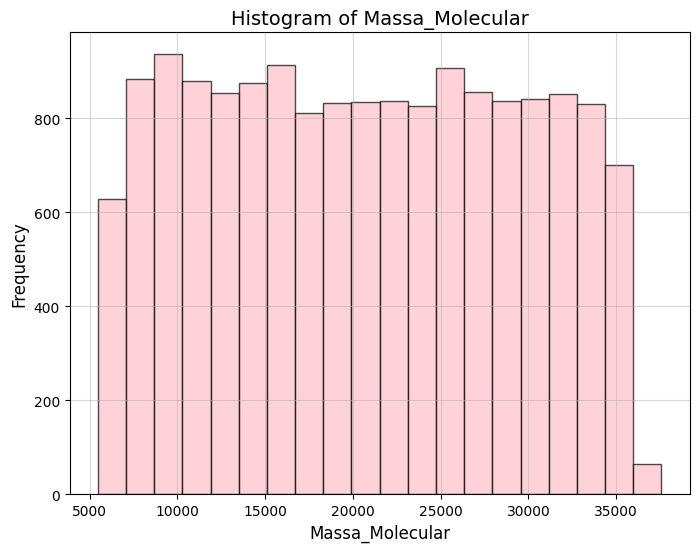

In [21]:
# Histogram of the first Numerical feature (example)

first_numerical_feature = 'Massa_Molecular' # Get name of the first numerical feature.

plt.figure(figsize=(8,6))
plt.hist(df_protein[first_numerical_feature], bins=20, edgecolor='black', color='pink', alpha=0.7)
plt.title(f"Histogram of {first_numerical_feature}", fontsize = 14)
plt.xlabel(first_numerical_feature, fontsize=12)
plt.ylabel("Frequency", fontsize=12)
plt.grid(True, alpha=0.5)
plt.show()

In [22]:
# Compares numerical features across classes
def compare_protein_features(df, target_col='Classe', logscale=False):
    """
    Compare feature distributions across protein classes with KS testing.
    Handles multiple classes by comparing each against all others.
    """
    classes = df[target_col].unique()
    print(f"Classes found: {classes}")
    
    # Select only numerical features
    numerical_features = [
        'Massa_Molecular', 'Ponto_Isoelétrico', 'Hidrofobicidade', 
        'Carga_Total', 'Proporção_Polar', 'Proporção_Apolar', 
        'Comprimento_Sequência'
    ]
    
    # Create plot grid
    n_features = len(numerical_features)
    n_cols = math.ceil(math.sqrt(n_features))
    n_rows = math.ceil(n_features / n_cols)
    
    plt.figure(figsize=(5*n_cols, 4*n_rows))

    
    # Get a distinct color for each class
    colors = plt.cm.tab10(np.linspace(0, 1, len(classes)))
    
    for i, feature in enumerate(numerical_features):
        plt.subplot(n_rows, n_cols, i+1)
        
        # Plot histogram for each class
        for cls, color in zip(classes, colors):
            subset = df[df[target_col] == cls]
            plt.hist(subset[feature], bins=30, histtype="step",
                    color=color, label=cls, density=True, linewidth=2)
        
        # calculate max KS statistic between any two classes
        ks_stats = []
        for j in range(len(classes)):
            for k in range(j+1, len(classes)):
                stat = scipy.stats.kstest(
                    df[df[target_col] == classes[j]][feature],
                    df[df[target_col] == classes[k]][feature]
                ).statistic
                ks_stats.append(stat)
        max_ks = max(ks_stats) if ks_stats else 0
        
        plt.title(f"{feature}\nMax KS={max_ks:.3f}", fontsize=10)
        plt.xlabel(feature, fontsize=10)
        plt.ylabel("Density", fontsize=10)
        plt.legend(fontsize=8)
        if logscale:
            plt.yscale("log")
        plt.grid(True, alpha=0.5)
    
    plt.tight_layout()
    plt.show()

Classes found: ['Estrutural' 'Receptora' 'Enzima' 'Transporte' 'Outras']


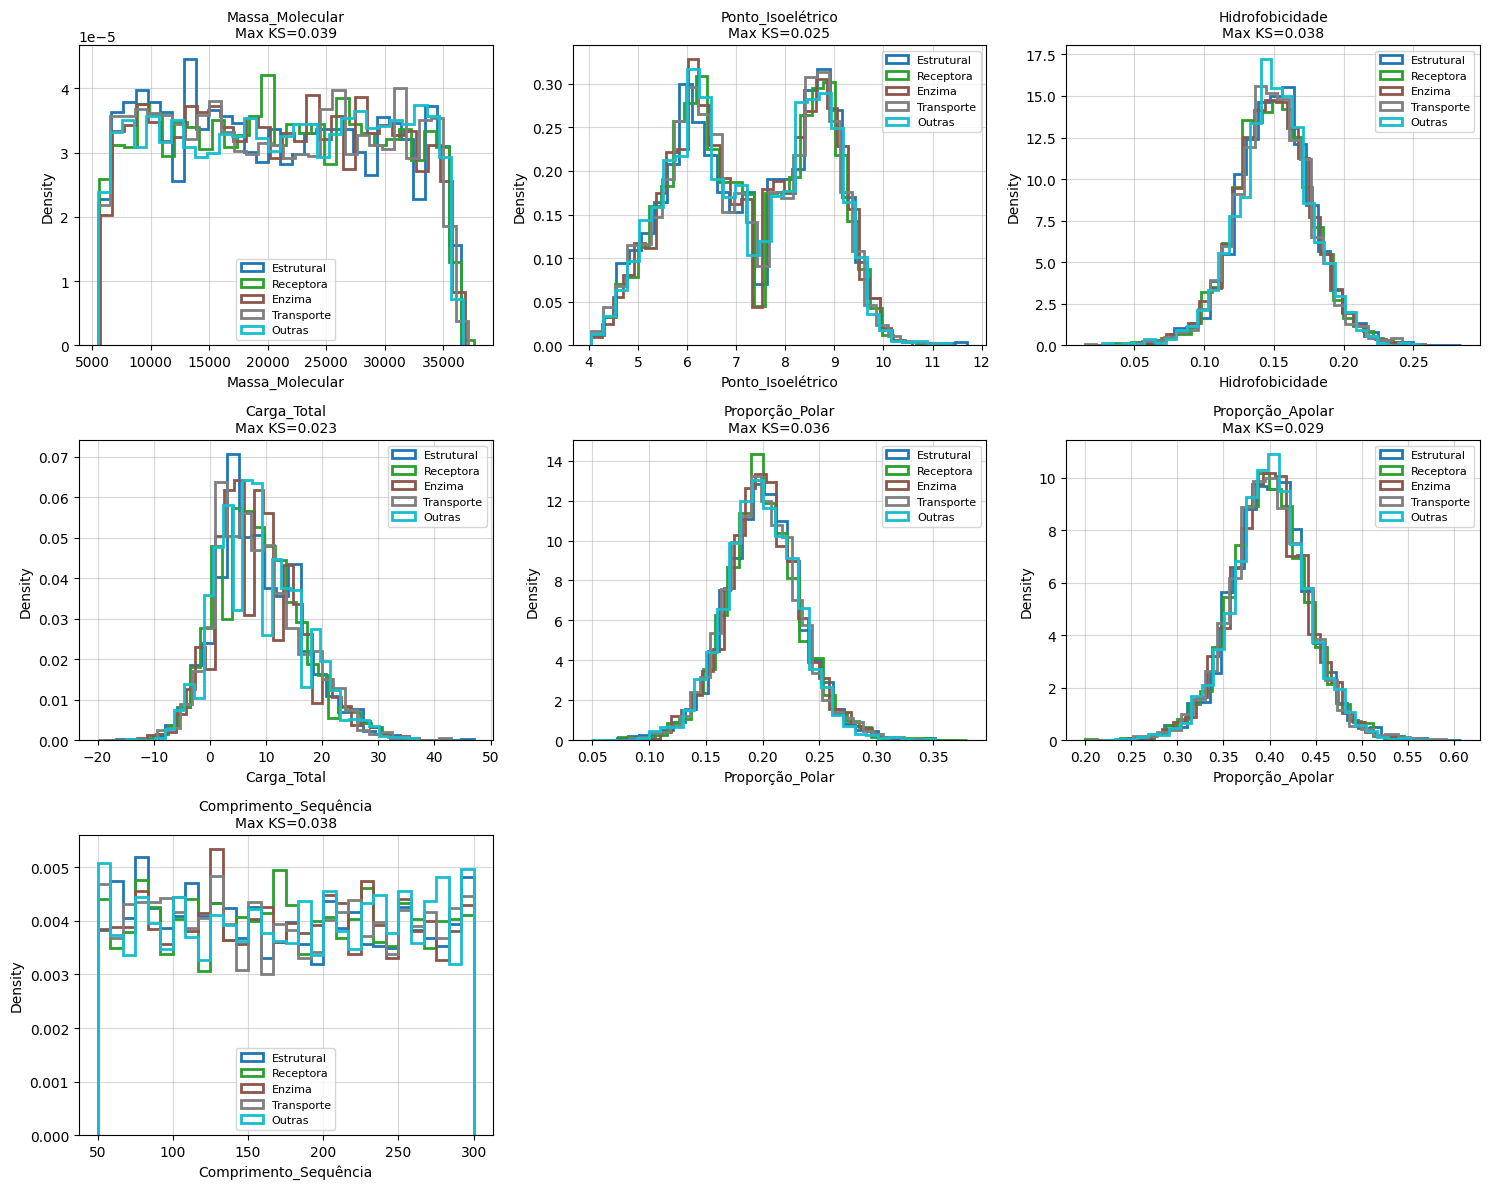

In [23]:
# Run analysis
compare_protein_features(df_protein)

The function provides a quantitative measure of the separability between the classes for each feature by calculating and displaying the maximum KS statistic.

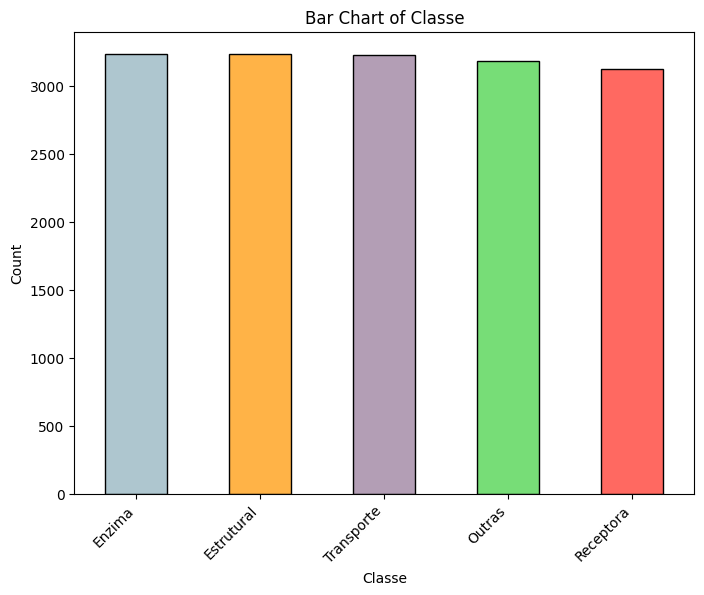

In [24]:
# Categorical feature visualization - bar charts

categorical_features = ['Classe']
colors = ['#AEC6CF', '#FFB347', '#B39EB5', '#77DD77', '#FF6961', '#FDFD96']

for feature in categorical_features:
    plt.figure(figsize=(8,6))
    df_protein[feature].value_counts().plot(kind='bar', color=colors, edgecolor='black')
    plt.title(f'Bar Chart of {feature}', fontsize=12)
    plt.xlabel(feature, fontsize=10)
    plt.ylabel("Count", fontsize=10)
    plt.xticks(rotation=45, ha='right', fontsize=10) # rotate x-axis labels
    plt.show()

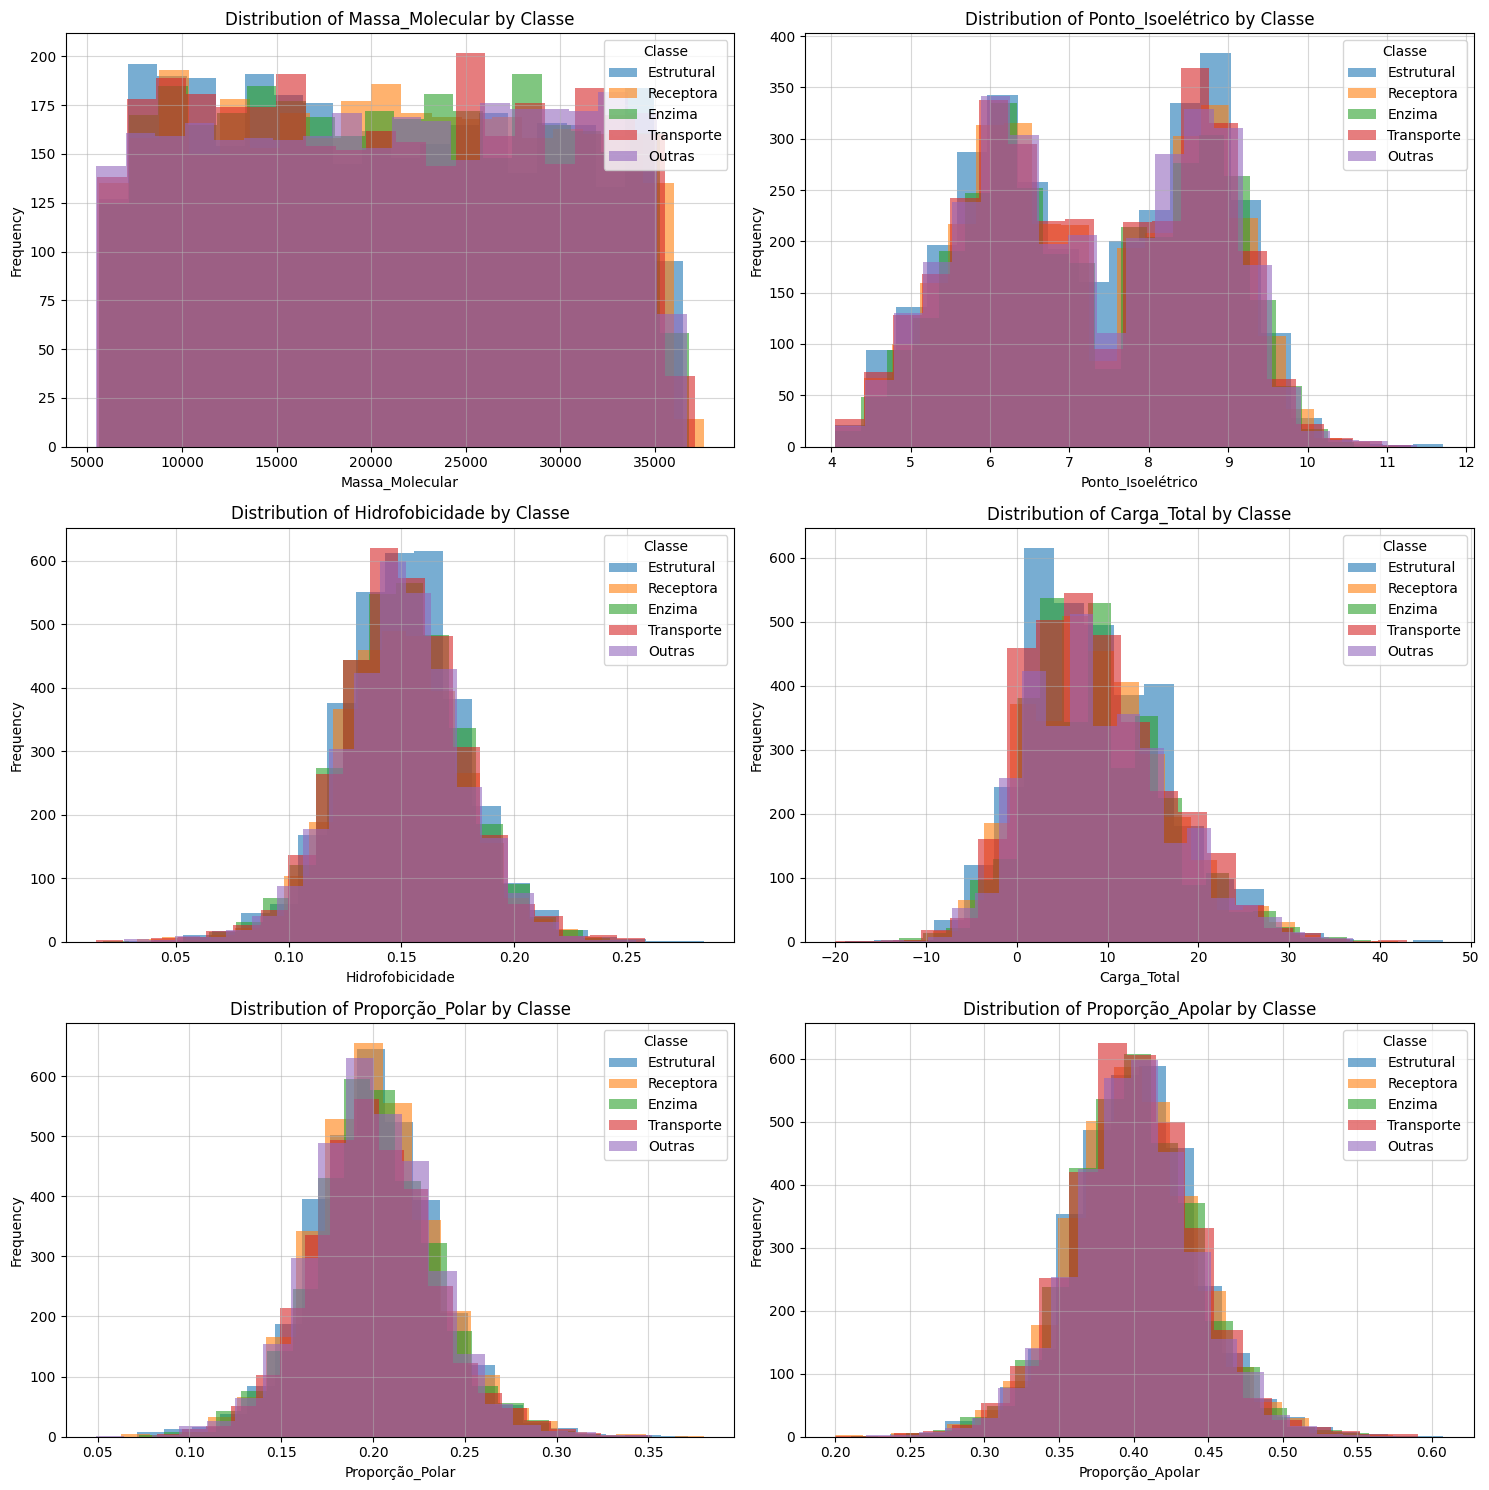

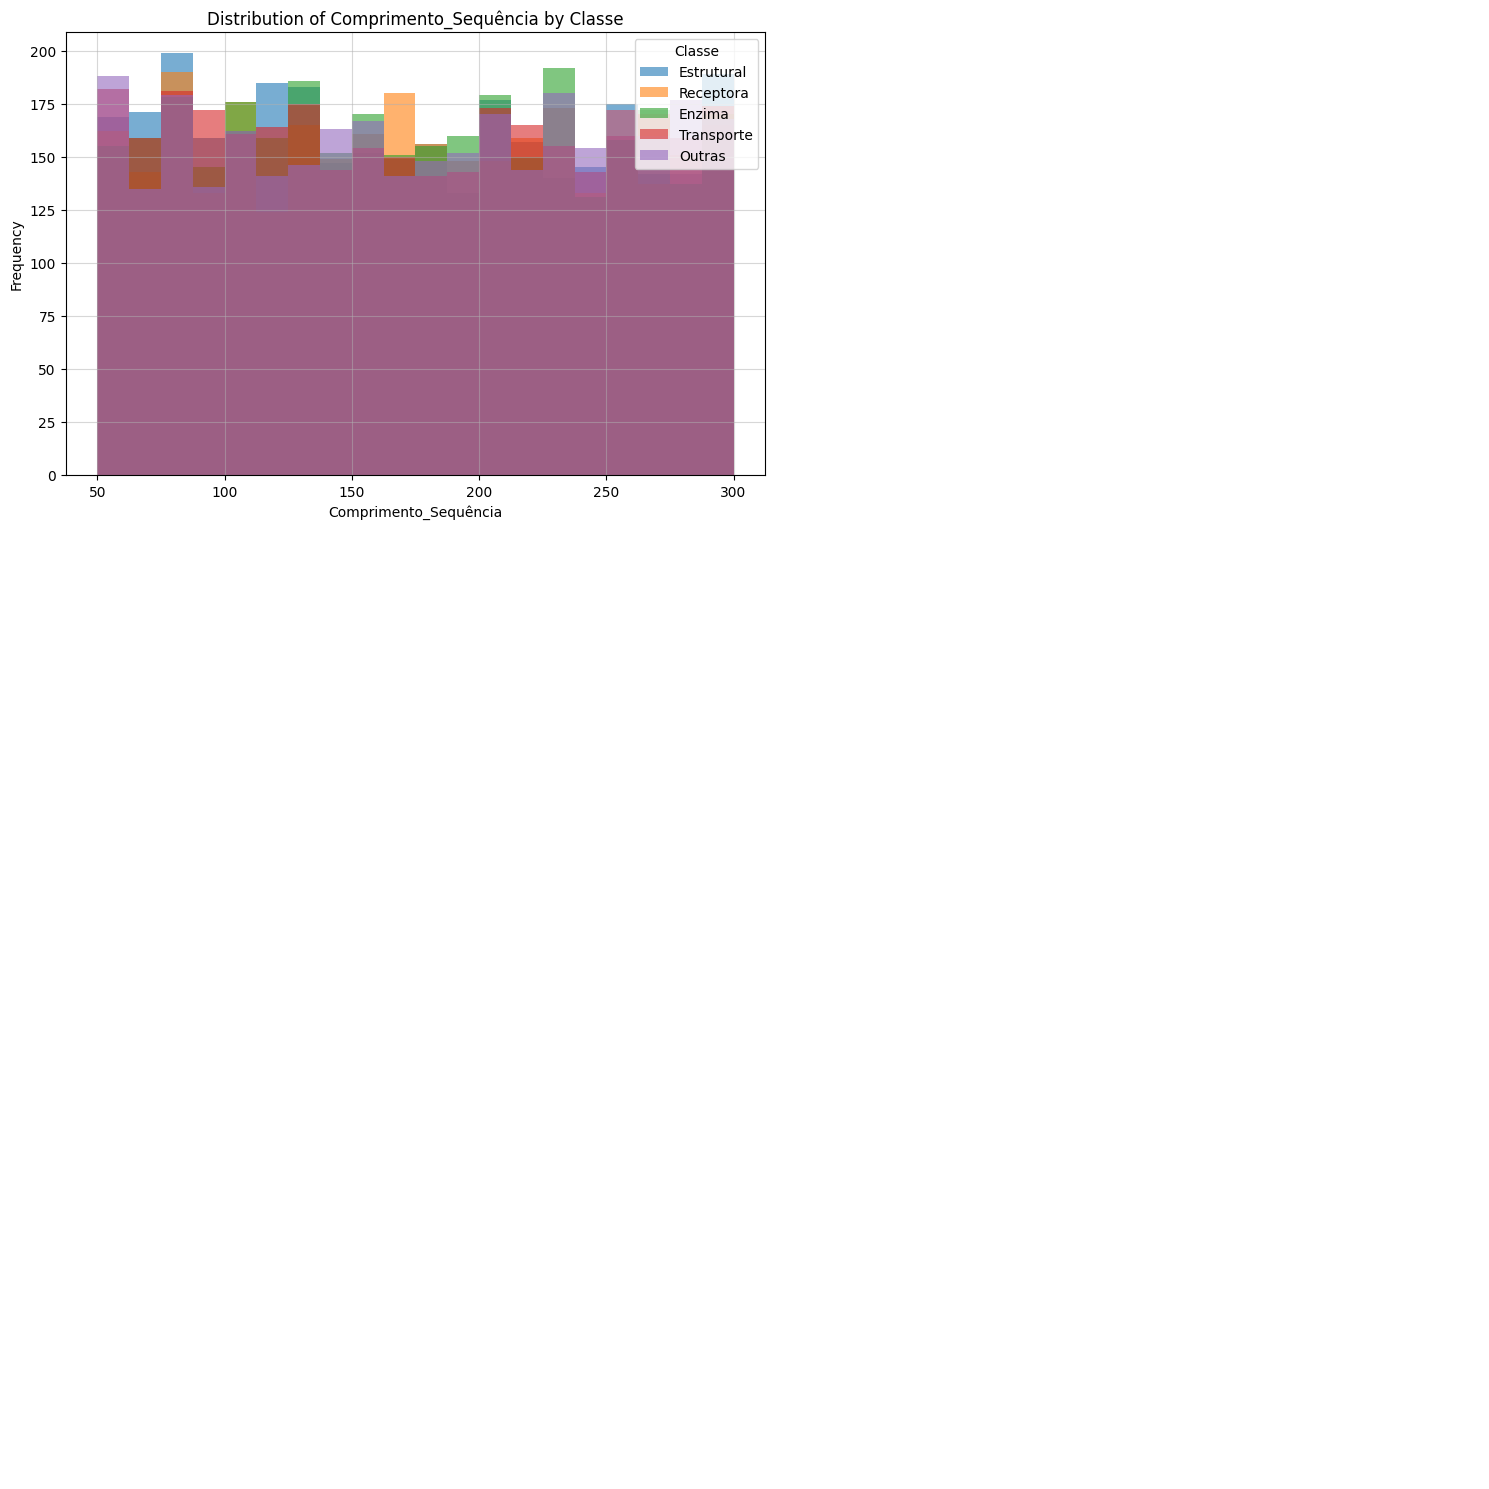

In [25]:
# Comparing distributions with histograms.

numerical_features = df_protein.select_dtypes(include=np.number).columns.tolist()
categorical_feature = 'Classe'
classes = df_protein[categorical_feature].unique()

num_features = len(numerical_features)
num_grids = (num_features + 5) // 6 # each grid shows 6 features

for grid_num in range(num_grids):
    # creates a 3x2 grid
    fig, axes = plt.subplots(3,2, figsize=(15,15))
    axes = axes.ravel()

    # get features for the grids
    index_start = grid_num* 6
    index_end = min(index_start + 6, num_features)
    grid_features = numerical_features[index_start:index_end]

    for i,  feature in enumerate(grid_features):
        for class_label in classes:
            subset = df_protein[df_protein[categorical_feature] == class_label]
            axes[i].hist(subset[feature], bins=20, alpha=0.6, label=class_label)

        axes[i].set_xlabel(feature)
        axes[i].set_ylabel('Frequency')
        axes[i].set_title(f'Distribution of {feature} by {categorical_feature}')
        axes[i].legend(title=categorical_feature)
        axes[i].grid(True, alpha=0.5)

    #hide any unused subplots
    for j in range(i+1, 6):
        axes[j].axis('off')
        
    plt.tight_layout()    
    plt.show()